hiveQ:
https://cwiki.apache.org/confluence/display/hive/languagemanual+udf
<br>
hive function:
http://hortonworks.com/wp-content/uploads/2016/05/Hortonworks.CheatSheet.SQLtoHive.pdf

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd

In [ ]:
sc= SparkContext('local')

# PySpark SQL
- SQLContext 객체 선언

In [ ]:
sqlCtx= SQLContext(sc)

In [ ]:
emp= [('홍길동',1),('이순신',2),
      ('임꺽정',3),('김철수',3),('김철수1',5)]
dept= [('개발',1), ('연구',2),
        ('영업',3),('기획',4) ]

In [ ]:
empRdd= sc.parallelize(emp)
empRdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:262

## RDD-> DataFrame

#### .toDF( )

In [ ]:
empDF1= empRdd.toDF()

In [ ]:
empDF1.show()

+-------+---+
|     _1| _2|
+-------+---+
| 홍길동|  1|
| 이순신|  2|
| 임꺽정|  3|
| 김철수|  3|
|김철수1|  5|
+-------+---+



## PysPark SQL

#### .createDataFrame(데이터 또는 RDD)

In [ ]:
empDF= sqlCtx.createDataFrame(emp)
empDF

DataFrame[_1: string, _2: bigint]

In [ ]:
empDF.show()

+-------+---+
|     _1| _2|
+-------+---+
| 홍길동|  1|
| 이순신|  2|
| 임꺽정|  3|
| 김철수|  3|
|김철수1|  5|
+-------+---+



#### .read.csv('파일 경로 및 파일 이름')
- header= True : 헤더로 컬럼 명 설정 
- inferSchema= True : string으로만 불러오기 방지


In [ ]:
df= sqlCtx.read.csv('data/crime_in_Seoul.csv', encoding= 'cp949', header= True, inferSchema= True)

In [ ]:
df

DataFrame[관서명: string, 살인 발생: int, 살인 검거: int, 강도 발생: int, 강도 검거: int, 강간 발생: int, 강간 검거: int, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string]

In [ ]:
df.show()

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|      869|      794|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|    2,056|    1,711|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|    1,015|      861|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704|
|  성북서|        2|        2|        2|        1|       86|       

#### .printSchema( )
- dtypes 확인할 수 있다.
- inferSchema를 True로 설정하지 않는다면, 무조건 string으로 데이터를 불러온다.

In [ ]:
df.printSchema()

root
 |-- 관서명: string (nullable = true)
 |-- 살인 발생: integer (nullable = true)
 |-- 살인 검거: integer (nullable = true)
 |-- 강도 발생: integer (nullable = true)
 |-- 강도 검거: integer (nullable = true)
 |-- 강간 발생: integer (nullable = true)
 |-- 강간 검거: integer (nullable = true)
 |-- 절도 발생: string (nullable = true)
 |-- 절도 검거: string (nullable = true)
 |-- 폭력 발생: string (nullable = true)
 |-- 폭력 검거: string (nullable = true)



#### .crateDataFrame 컬럼 명 설정

In [ ]:
testDF= sqlCtx.createDataFrame(emp, ['name', 'deptid'])

In [ ]:
testDF.show()

+-------+------+
|   name|deptid|
+-------+------+
| 홍길동|     1|
| 이순신|     2|
| 임꺽정|     3|
| 김철수|     3|
|김철수1|     5|
+-------+------+



## DataFrame

#### .toPandas( )
- 분산 데이터프레임을 하나로 모아 Pandas로 만들어준다.
- 메모리를 정말 많이 잡아 먹는다.
- RDD의 collect처럼 함부로 사용하면 안 된다.
- 데이터 양을 정제한 후에, 사용해야 한다.

In [ ]:
testDF.toPandas()

,name,deptid
0,홍길동,1
1,이순신,2
2,임꺽정,3
3,김철수,3
4,김철수1,5


#### .createOrReplaceTempView('이름')
- SQL 쿼리 사용을 위해 DataFrame에 이름을 부여한다.

In [ ]:
testDF.createOrReplaceTempView('my')

## DataFrame + PySpark SQL

#### .sql( )
```
SQL 쿼리-> select '가져올 컬럼' from 'DataFrame 이름' 쿼리 문
-> SQLContext 객체.sql(쿼리 문)
-> .show( )
```

In [ ]:
#sql= "select*from my"
#sql= "select*from my where deptid=1"
#sql= "select*from my where deptid=1 or deptid=2"
#sql= "select*from my where name='홍길동'"
#sql= "select*from my where deptid in (1,3)"
#sql= "select*from my where deptid>=2 and deptid<=4"
#sql= "select*from my where deptid between 2 and 4"
#sql= "select*from my where name like '%김%'"
#sql= "select*from my where name rlike '김'"
#sql= "select*from my where name rlike '^김'"
#sql= "select*from my where name rlike '신$'"
#sql= "select*from my where name rlike '[길김]'"
#sql= "select*from my where name rlike '홍길|철수'"
#sql= "select max(deptid) from my"
#sql= "select min(deptid) from my"
#sql= "select sum(deptid) from my"
#sql= "select avg(deptid) from my"
#sql= "select sum(deptid), avg(deptid) from my"
#sql= "select stddev_samp(deptid) as std from my"
#sql= "select deptid+2 from my"
#sql= "select deptid*2 from my"
#sql= "select * from my order by name desc"
sql= "select * from my order by name desc limit 3"
sqlDF= sqlCtx.sql(sql)
sqlDF.show()

+------+------+
|  name|deptid|
+------+------+
|홍길동|     1|
|임꺽정|     3|
|이순신|     2|
+------+------+



예제 문제<br>
1. 급여가 가장높은 name과 salary를 출력하시요<br>
2. name, salary, tax 를 출력하시요. (tax는 급여에서 세금 3.3을 제한값)<br>
3. name 에 '철'이 포함된  name,salary 를 출력하시요.<br>
4. salary top 5 인 name, salary 출력하시요.<br>
5. salary  2000  과 4000 사이의 데이터를 출력하시요.<br>
6. 정도 컬럼을 만드시요. (급여가 5000이상이면 '많음', 3000이상이면 '보통', 나머지는'적음')

- name, salary 컬럼 명을 가지는 DataFrame을 만드시요.<br>
.createDataFrame()<br>
.toDF()

In [ ]:
data1= ['홍길동,1000','이순신,2000','임꺽정,3000',
         '김철수,4000','이황,5000','이이,6000']

In [ ]:
data2= sc.parallelize(data1).map(lambda v: v.split(','))
data2= data2.map(lambda v: (v[0],int(v[1])))
data2.collect()

[('홍길동', 1000),
 ('이순신', 2000),
 ('임꺽정', 3000),
 ('김철수', 4000),
 ('이황', 5000),
 ('이이', 6000)]

In [ ]:
# 1
df2= sqlCtx.createDataFrame(data2, ['name', 'salary'])
df2.show()

+------+------+
|  name|salary|
+------+------+
|홍길동|  1000|
|이순신|  2000|
|임꺽정|  3000|
|김철수|  4000|
|  이황|  5000|
|  이이|  6000|
+------+------+



In [ ]:
# 2
data2.toDF(['name', 'salary']).show()

+------+------+
|  name|salary|
+------+------+
|홍길동|  1000|
|이순신|  2000|
|임꺽정|  3000|
|김철수|  4000|
|  이황|  5000|
|  이이|  6000|
+------+------+



In [ ]:
# 이름 부여
df2.createOrReplaceTempView('quiz')

In [ ]:
df2.printSchema()

root
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



- 1.

In [ ]:
sql2= "select * from quiz where salary= (select max(salary) from quiz)"
#sql2= "select * from quiz order by salary desc limit 1"  # 동률 값이 있을 때는 2개 출력을 못한다.
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+----+------+
|name|salary|
+----+------+
|이이|  6000|
+----+------+



- 2.

In [ ]:
sql2= "select *, salary*0.967 as tax from quiz"
#sql2= "select *, salary*(1-0.033) as tax from quiz"
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+------+------+--------+
|  name|salary|     tax|
+------+------+--------+
|홍길동|  1000| 967.000|
|이순신|  2000|1934.000|
|임꺽정|  3000|2901.000|
|김철수|  4000|3868.000|
|  이황|  5000|4835.000|
|  이이|  6000|5802.000|
+------+------+--------+



- 3.

In [ ]:
sql2= "select * from quiz where name rlike '철'"
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+------+------+
|  name|salary|
+------+------+
|김철수|  4000|
+------+------+



- 4.

In [ ]:
sql2= "select * from quiz order by salary desc limit 5"
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+------+------+
|  name|salary|
+------+------+
|  이이|  6000|
|  이황|  5000|
|김철수|  4000|
|임꺽정|  3000|
|이순신|  2000|
+------+------+



- 5.

In [ ]:
sql2= "select * from quiz where salary between 2000 and 4000"
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+------+------+
|  name|salary|
+------+------+
|이순신|  2000|
|임꺽정|  3000|
|김철수|  4000|
+------+------+



- 6.

In [ ]:
sql2= "select salary, case WHEN salary >= 5000 THEN '많음' WHEN salary >= 3000 THEN '보통' ELSE '적음' END AS `정도`  from quiz"
# sql2 = '''
# select salary, 
# case WHEN salary >= 5000 
# THEN '많음' 
# WHEN salary >= 3000 
# THEN '보통' 
# ELSE '적음' 
# END AS `정도` 
# from quiz'''  
sqlDF2= sqlCtx.sql(sql2)
sqlDF2.show()

+------+----+
|salary|정도|
+------+----+
|  1000|적음|
|  2000|적음|
|  3000|보통|
|  4000|보통|
|  5000|많음|
|  6000|많음|
+------+----+



# 퀴즈
```
sklearn.dataset 또는 csv 파일(타이타닉,... )->
PySpark SQL로 EDA 수행
```

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### data-> RDD-> PySpark SQL

In [ ]:
iris_data= sc.parallelize(iris.data.tolist()).map(lambda v: [float(v[0]) ,float(v[1]), float(v[2]), float(v[3])])
iris_data.collect()

In [ ]:
df_iris= sqlCtx.createDataFrame(iris_data, iris.feature_names)
df_iris.show()

In [ ]:
type(iris.target.tolist())

In [ ]:
type(iris.target.tolist()[0])

In [ ]:
label_data= sc.parallelize(iris.target.tolist()).map(lambda v: [v])
label_data.collect()

In [ ]:
df_label= sqlCtx.createDataFrame(label_data, ['label'])
df_label.show()

In [ ]:
# X
iris_data.cartesian(sc.parallelize(iris.target.tolist()).map(lambda v: [v])).collect()

In [ ]:
# X
sqlCtx.createDataFrame(iris_data.cartesian(sc.parallelize(iris.target.tolist()).map(lambda v: [v]))).show()

### withColumn
- 기존의 방식대로 concat을 할 수 없다.
- DataFrame을 합치기 위해 의미없는 컬럼 생성해서 join을 해야 한다.

#### monotonically_increasing_id
- 자동 순서 0 ~

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
a= df_iris.withColumn("drop", monotonically_increasing_id())
b= df_label.withColumn("drop", monotonically_increasing_id())

a.show(), b.show()

+-----------------+----------------+-----------------+----------------+----+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|drop|
+-----------------+----------------+-----------------+----------------+----+
|              5.1|             3.5|              1.4|             0.2|   0|
|              4.9|             3.0|              1.4|             0.2|   1|
|              4.7|             3.2|              1.3|             0.2|   2|
|              4.6|             3.1|              1.5|             0.2|   3|
|              5.0|             3.6|              1.4|             0.2|   4|
|              5.4|             3.9|              1.7|             0.4|   5|
|              4.6|             3.4|              1.4|             0.3|   6|
|              5.0|             3.4|              1.5|             0.2|   7|
|              4.4|             2.9|              1.4|             0.2|   8|
|              4.9|             3.1|              1.5|             0.1|   9|

(None, None)

In [ ]:
# a.join(b, 'drop').show() # drop의 순서가 섞이는가..?
df_final= a.join(b, 'drop').drop('drop')
df_final.show()

+-----------------+----------------+-----------------+----------------+-----+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|label|
+-----------------+----------------+-----------------+----------------+-----+
|              5.0|             3.4|              1.6|             0.4|    0|
|              4.7|             3.2|              1.6|             0.2|    0|
|              6.7|             3.1|              4.4|             1.4|    1|
|              5.1|             3.8|              1.5|             0.3|    0|
|              6.5|             2.8|              4.6|             1.5|    1|
|              5.1|             3.5|              1.4|             0.2|    0|
|              6.8|             3.0|              5.5|             2.1|    2|
|              5.7|             2.5|              5.0|             2.0|    2|
|              4.6|             3.6|              1.0|             0.2|    0|
|              7.4|             2.8|              6.1|          

In [ ]:
df_final.printSchema()

root
 |-- sepal length (cm): double (nullable = true)
 |-- sepal width (cm): double (nullable = true)
 |-- petal length (cm): double (nullable = true)
 |-- petal width (cm): double (nullable = true)
 |-- label: long (nullable = true)



In [ ]:
iris.data.shape

(150, 4)

#### DataFrame 이름 선언

In [ ]:
df_final.createOrReplaceTempView('iris')

In [ ]:
sql3= "select * from iris"
sql_iris= sqlCtx.sql(sql3)
sql_iris.show()

+-----------------+----------------+-----------------+----------------+-----+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|label|
+-----------------+----------------+-----------------+----------------+-----+
|              5.0|             3.4|              1.6|             0.4|    0|
|              4.7|             3.2|              1.6|             0.2|    0|
|              6.7|             3.1|              4.4|             1.4|    1|
|              5.1|             3.8|              1.5|             0.3|    0|
|              6.5|             2.8|              4.6|             1.5|    1|
|              5.1|             3.5|              1.4|             0.2|    0|
|              6.8|             3.0|              5.5|             2.1|    2|
|              5.7|             2.5|              5.0|             2.0|    2|
|              4.6|             3.6|              1.0|             0.2|    0|
|              7.4|             2.8|              6.1|          

#### target 별 개수 확인

In [ ]:
sql3= "select COUNT(*) from iris group by label"
sql_iris= sqlCtx.sql(sql3)
sql_iris.show()

+--------+
|count(1)|
+--------+
|      50|
|      50|
|      50|
+--------+



In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### target number-> name

In [ ]:
sql3 = '''select *, 
case when label=0 then 'setosa' when label=1 then 'versicolor' else 'virginica' end
as label_name
from iris'''
sql_iris= sqlCtx.sql(sql3)
sql_iris.show()

+-----------------+----------------+-----------------+----------------+-----+----------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|label|label_name|
+-----------------+----------------+-----------------+----------------+-----+----------+
|              5.0|             3.4|              1.6|             0.4|    0|    setosa|
|              4.7|             3.2|              1.6|             0.2|    0|    setosa|
|              6.7|             3.1|              4.4|             1.4|    1|versicolor|
|              5.1|             3.8|              1.5|             0.3|    0|    setosa|
|              6.5|             2.8|              4.6|             1.5|    1|versicolor|
|              5.1|             3.5|              1.4|             0.2|    0|    setosa|
|              6.8|             3.0|              5.5|             2.1|    2| virginica|
|              5.7|             2.5|              5.0|             2.0|    2| virginica|
|              4.6|  

#### sepal, petal 별 target 시각화

In [ ]:
sql3= '''select `sepal length (cm)`,  `sepal width (cm)`,
case when label=0 then 'setosa' when label=1 then 'versicolor' else 'virginica' end
as label_name
from iris'''
sql_iris= sqlCtx.sql(sql3)
sql_iris.show()

+-----------------+----------------+----------+
|sepal length (cm)|sepal width (cm)|label_name|
+-----------------+----------------+----------+
|              5.0|             3.4|    setosa|
|              4.7|             3.2|    setosa|
|              6.7|             3.1|versicolor|
|              5.1|             3.8|    setosa|
|              6.5|             2.8|versicolor|
|              5.1|             3.5|    setosa|
|              6.8|             3.0| virginica|
|              5.7|             2.5| virginica|
|              4.6|             3.6|    setosa|
|              7.4|             2.8| virginica|
|              5.0|             3.4|    setosa|
|              6.7|             3.0|versicolor|
|              4.9|             3.1|    setosa|
|              6.2|             2.8| virginica|
|              7.0|             3.2|versicolor|
|              5.6|             2.7|versicolor|
|              5.9|             3.0| virginica|
|              6.5|             3.2| vir

C:\Users\TFG5076XG\anaconda3\envs\jaehong\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

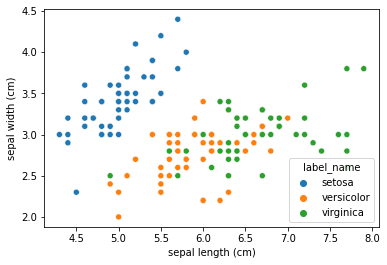

In [ ]:
import seaborn as sns
sns.scatterplot(sql_iris.toPandas().iloc[:,0], sql_iris.toPandas().iloc[:,1], data =sql_iris.toPandas(), hue='label_name')

In [ ]:
sql3= '''select `petal length (cm)`,  `petal width (cm)`,
case when label=0 then 'setosa' when label=1 then 'versicolor' else 'virginica' end
as label_name
from iris'''
sql_iris= sqlCtx.sql(sql3)
sql_iris.show()

+-----------------+----------------+----------+
|petal length (cm)|petal width (cm)|label_name|
+-----------------+----------------+----------+
|              1.6|             0.4|    setosa|
|              1.6|             0.2|    setosa|
|              4.4|             1.4|versicolor|
|              1.5|             0.3|    setosa|
|              4.6|             1.5|versicolor|
|              1.4|             0.2|    setosa|
|              5.5|             2.1| virginica|
|              5.0|             2.0| virginica|
|              1.0|             0.2|    setosa|
|              6.1|             1.9| virginica|
|              1.5|             0.2|    setosa|
|              5.0|             1.7|versicolor|
|              1.5|             0.2|    setosa|
|              4.8|             1.8| virginica|
|              4.7|             1.4|versicolor|
|              4.2|             1.3|versicolor|
|              5.1|             1.8| virginica|
|              5.1|             2.0| vir

C:\Users\TFG5076XG\anaconda3\envs\jaehong\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

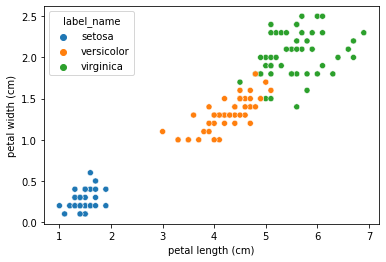

In [ ]:
import seaborn as sns
sns.scatterplot(sql_iris.toPandas().iloc[:,0], sql_iris.toPandas().iloc[:,1], data =sql_iris.toPandas(), hue='label_name')

## 메모리 회수

In [ ]:
sc.stop()